In [1]:
# https://www.kaggle.com/datasets/jeevannagaraj/indian-liver-patient-dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'D:\batch -3\Machine learning project\Project 21 Liver Disease Prediction\Indian Liver Patient Dataset (ILPD).csv')

In [4]:
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df.shape

(583, 11)

In [6]:
df.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [7]:
df = df.dropna(how='any')

In [8]:
df.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64

In [9]:
df.columns

Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'is_patient'],
      dtype='object')

In [10]:
df.replace({"gender":{'Female':0,'Male':1}},inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_3308\2430351173.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"gender":{'Female':0,'Male':1}},inplace=True)


In [11]:
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


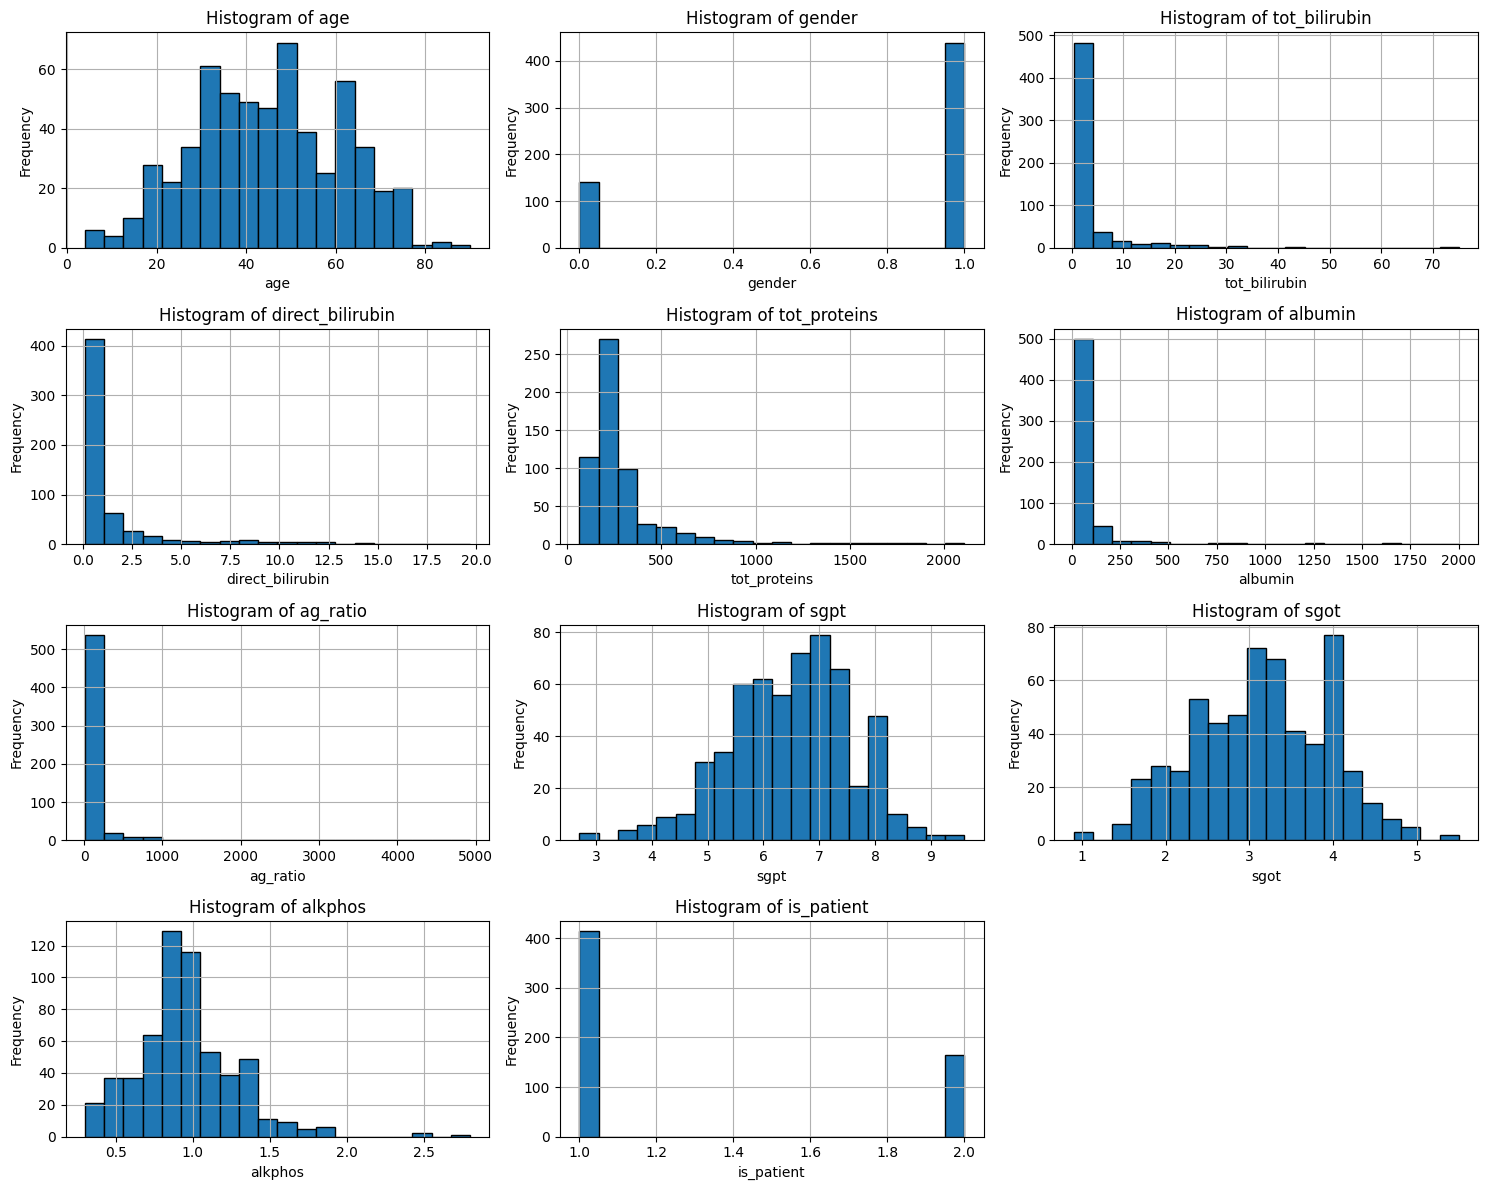

In [12]:
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 12))

# Her bir sütun için histogramları çizme
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    df[col].hist(bins=20, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

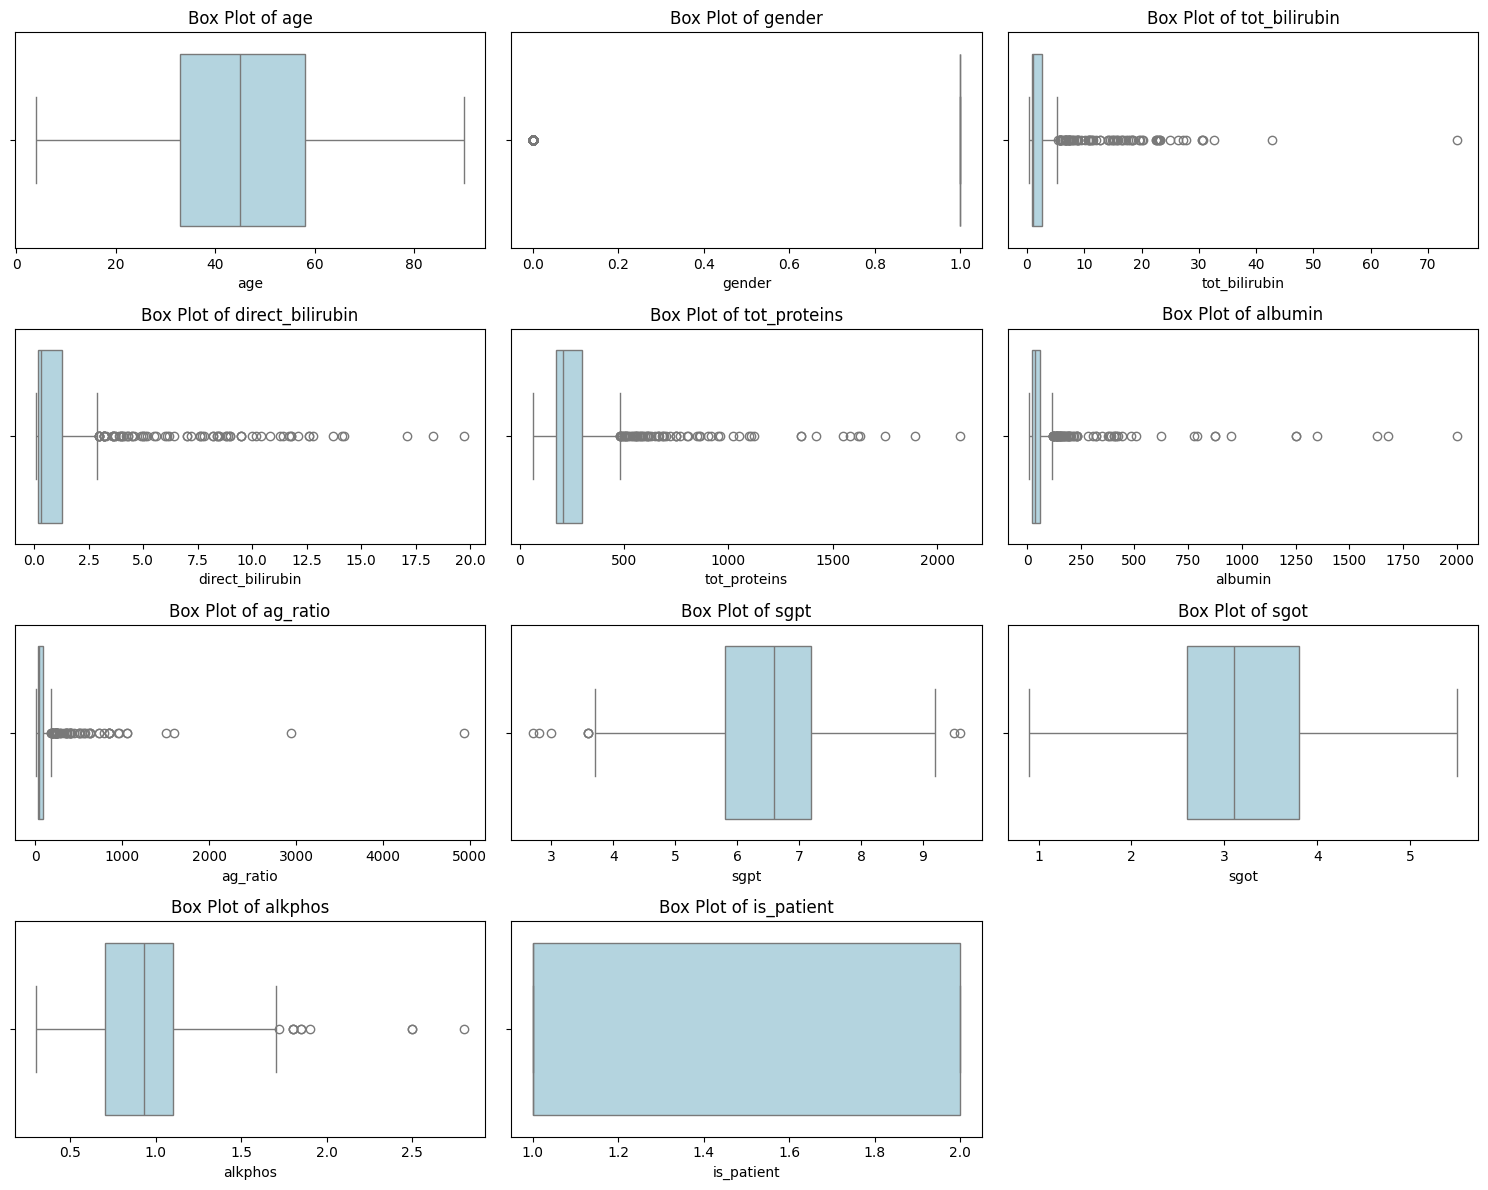

In [13]:

import seaborn as sns
plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, x=col, color='lightblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

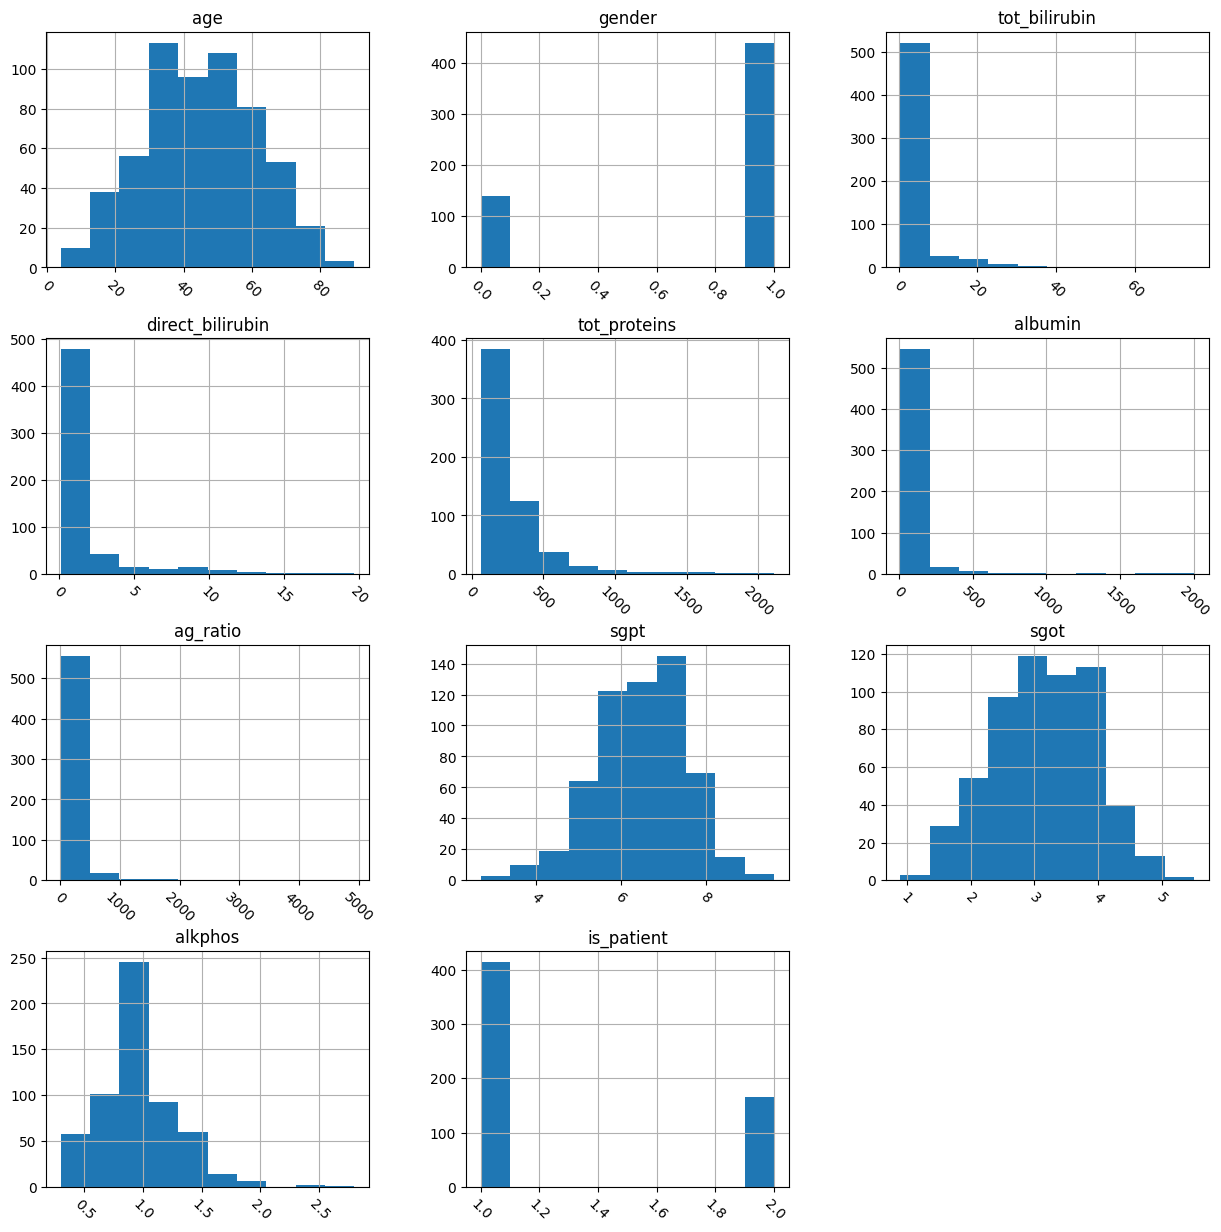

In [14]:
df.hist(figsize=(15,15), xrot=-45,bins=10)
plt.show()

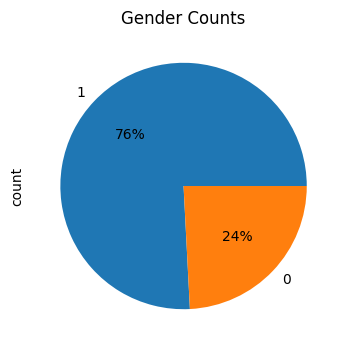

In [15]:
plt.figure(figsize=(8,4))
df["gender"].value_counts().plot(kind = "pie",autopct='%.0f%%')
plt.title("Gender Counts")
plt.show()

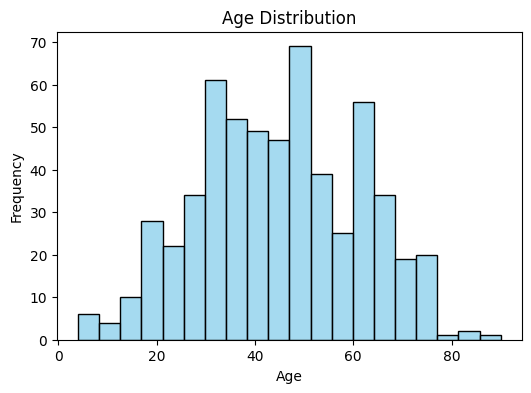

In [16]:
# Age Distribution
# We can use histogram or kdeplot (kernel density estimation) to see the age distribution.

plt.figure(figsize=(6, 4))
sns.histplot(df['age'], bins=20, kde=False, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [17]:
correlation_matrix = df.corr()
correlation_matrix

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
age,1.000000,0.055881,0.011000,0.006784,0.078878,-0.087799,-0.020499,-0.186248,-0.264211,-0.216408,-0.133164
gender,0.055881,1.000000,0.088068,0.099160,-0.029368,0.081339,0.079421,-0.095149,-0.095579,-0.003424,-0.081349
tot_bilirubin,0.011000,0.088068,1.000000,0.874481,0.205739,0.213375,0.237323,-0.007906,-0.222087,-0.206267,-0.220218
direct_bilirubin,0.006784,0.099160,0.874481,1.000000,0.234008,0.233180,0.257022,0.000033,-0.228409,-0.200125,-0.246273
tot_proteins,0.078878,-0.029368,0.205739,0.234008,1.000000,0.124777,0.166580,-0.027062,-0.163419,-0.234166,-0.183363
albumin,-0.087799,0.081339,0.213375,0.233180,0.124777,1.000000,0.791862,-0.042432,-0.028658,-0.002375,-0.163117
ag_ratio,-0.020499,0.079421,0.237323,0.257022,0.166580,0.791862,1.000000,-0.025751,-0.084915,-0.070040,-0.151834
sgpt,-0.186248,-0.095149,-0.007906,0.000033,-0.027062,-0.042432,-0.025751,1.000000,0.783112,0.234887,0.033614
sgot,-0.264211,-0.095579,-0.222087,-0.228409,-0.163419,-0.028658,-0.084915,0.783112,1.000000,0.689632,0.159770
alkphos,-0.216408,-0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131


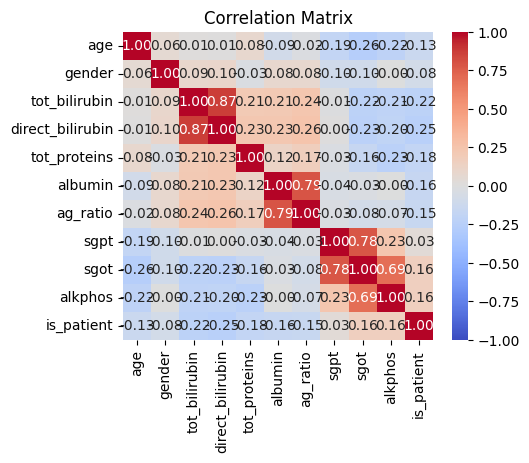

In [18]:
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

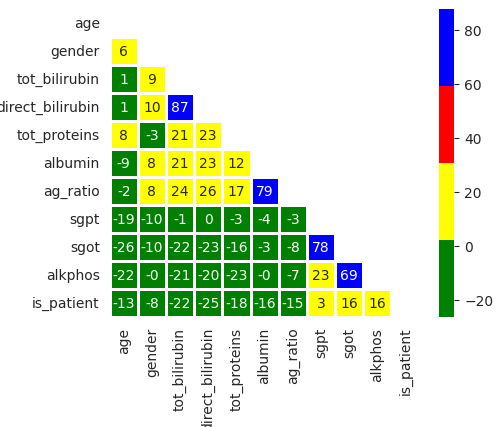

In [19]:
from matplotlib.colors import ListedColormap

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(5,4))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt = ".0f", annot=True, lw=1, cmap=ListedColormap(['green','yellow','red','blue']))

In [20]:
x = df.drop(columns=['is_patient'])

y = df['is_patient']

In [21]:
print(x)

     age  gender  tot_bilirubin  direct_bilirubin  tot_proteins  albumin  \
0     65       0            0.7               0.1           187       16   
1     62       1           10.9               5.5           699       64   
2     62       1            7.3               4.1           490       60   
3     58       1            1.0               0.4           182       14   
4     72       1            3.9               2.0           195       27   
..   ...     ...            ...               ...           ...      ...   
578   60       1            0.5               0.1           500       20   
579   40       1            0.6               0.1            98       35   
580   52       1            0.8               0.2           245       48   
581   31       1            1.3               0.5           184       29   
582   38       1            1.0               0.3           216       21   

     ag_ratio  sgpt  sgot  alkphos  
0          18   6.8   3.3     0.90  
1         100

In [22]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: is_patient, Length: 579, dtype: int64


In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [24]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(xtrain,ytrain)

SVC(kernel='linear')

In [25]:
# accuracy on training data
xtrain_prediction = model.predict(xtrain)
training_data_accuracy = accuracy_score(ytrain, xtrain_prediction)

print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.7041036717062635


In [26]:
# accuracy on test data
xtest_prediction = model.predict(xtest)
test_data_accuracy = accuracy_score( xtest_prediction, ytest)

print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.7586206896551724


In [27]:
input_data = (65,0,0.7,0.1,187,16,18,6.8,3.3,0.9)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print('The person Liver Diseases')

else:
  print('The person is not liver  disease')


[1]
The person Liver Diseases


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [28]:
import pickle


filename = 'Liver Disease.sav'
pickle.dump(model, open(filename, 'wb'))


# loading the saved model
loaded_model = pickle.load(open('Liver Disease.sav', 'rb'))

for column in df.columns:
    print(column)

age
gender
tot_bilirubin
direct_bilirubin
tot_proteins
albumin
ag_ratio
sgpt
sgot
alkphos
is_patient


In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(xtrain, ytrain)

RandomForestClassifier()

In [30]:
# accuracy on training data
xtrain_prediction = model.predict(xtrain)
training_data_accuracy = accuracy_score(ytrain, xtrain_prediction)

print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  1.0


In [31]:
# accuracy on test data
xtest_prediction = model.predict(xtest)
test_data_accuracy = accuracy_score( xtest_prediction, ytest)

print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.6982758620689655


In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(xtrain,ytrain)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
# accuracy on test data
xtest_prediction = model.predict(xtest)
test_data_accuracy = accuracy_score( xtest_prediction, ytest)

print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.7413793103448276


In [34]:
# Classification Report
print("\LogisticRegression Classification Report:\n", classification_report(ytest,xtest_prediction ))

\LogisticRegression Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.93      0.85        88
           2       0.40      0.14      0.21        28

    accuracy                           0.74       116
   macro avg       0.59      0.54      0.53       116
weighted avg       0.68      0.74      0.69       116



<>:2: SyntaxWarning: invalid escape sequence '\L'
<>:2: SyntaxWarning: invalid escape sequence '\L'
C:\Users\User\AppData\Local\Temp\ipykernel_3308\124163155.py:2: SyntaxWarning: invalid escape sequence '\L'
  print("\LogisticRegression Classification Report:\n", classification_report(ytest,xtest_prediction ))


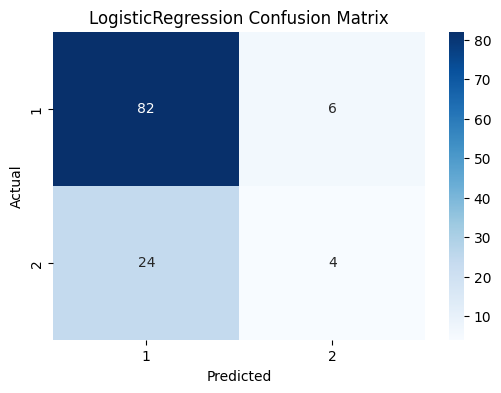

In [35]:
# Generate Confusion Matrix
cm = confusion_matrix(ytest, xtest_prediction)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(ytest), yticklabels=np.unique(ytest))
plt.title("LogisticRegression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [36]:
# Import ML Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [37]:
### 1. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)
knn_pred = knn.predict(xtest)
print("KNN Accuracy:", accuracy_score(ytest, knn_pred))

KNN Accuracy: 0.6810344827586207


In [38]:
### 2. Decision Tree
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
dt_pred = dt.predict(xtest)
print("Decision Tree Accuracy:", accuracy_score(dt_pred,ytest ))

Decision Tree Accuracy: 0.646551724137931


In [39]:
from sklearn import svm
# Train the model
model = svm.SVC(kernel='linear')
model.fit(xtrain, ytrain)
y_pre = model.predict(xtest)
accuracy = accuracy_score(ytest,y_pre)
accuracy

0.7586206896551724

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42)
model.fit(xtrain, ytrain)
xtest_prediction = model.predict(xtest)
test_data_accuracy = accuracy_score( xtest_prediction, ytest)

print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.7241379310344828


In [41]:
### 5. Artificial Neural Network (ANN)
model = Sequential([
    Dense(16, activation='relu', input_shape=(xtrain.shape[1],)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes in Iris dataset
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(xtrain, ytrain, epochs=50, batch_size=5, verbose=0)

# Evaluate ANN
ann_pred = np.argmax(model.predict(xtest), axis=1)
print("ANN Accuracy:", accuracy_score(ytest, ann_pred))

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
ANN Accuracy: 0.7672413793103449


In [42]:
from sklearn.naive_bayes import GaussianNB #Naive bayes

model = GaussianNB()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
test_data_accuracy = accuracy_score( y_pred, ytest)
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.5431034482758621


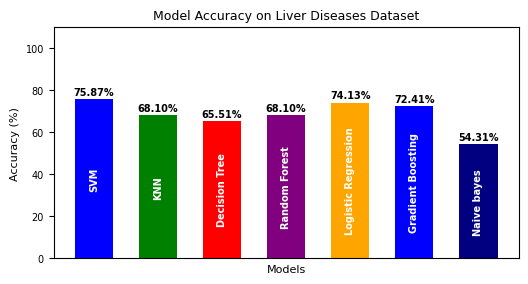

In [54]:
import matplotlib.pyplot as plt

# Data
models = ["SVM", "KNN", "Decision Tree", "Random Forest", "Logistic Regression", "Gradient Boosting","Naive bayes"]
accuracy = [75.87, 68.10, 65.51, 68.10, 74.13, 72.41,54.31]

# Plot
plt.figure(figsize=(6, 3))  # Small figure size
bars = plt.bar(models, accuracy, color=['blue', 'green', 'red', 'purple', 'orange', 'blue', 'navy'], width=0.6)

# Add model names inside the bars (centered)
for bar, model in zip(bars, models):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, model, ha='center', va='center',
             fontsize=7, fontweight='bold', color='white', rotation=90)  # Rotated for better fit

# Add accuracy values above the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f"{bar.get_height():.2f}%",
             ha='center', fontsize=7, fontweight='bold', color='black')

# Labels and title
plt.xlabel("Models", fontsize=8)
plt.ylabel("Accuracy (%)", fontsize=8)
plt.title("Model Accuracy on Liver Diseases Dataset", fontsize=9)
plt.xticks([])  # Remove x-axis labels since names are inside bars
plt.yticks(fontsize=7)
plt.ylim(0, 110)  # Set y-axis limit above 100

# Show plot
plt.show()